In [1]:
from IPython.display import Markdown
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Markdown("## Histograms")

## Histograms

In [2]:
def load_img(path):
    img = cv2.imread(f'../../resources/DATA/{path}') # original for opencv
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converted to rgb for show
    return img, show_img

dark_horse, show_horse = load_img('horse.jpg')
rainbow, show_rainbow = load_img('rainbow.jpg')
blue_bricks, show_bricks = load_img('bricks.jpg')

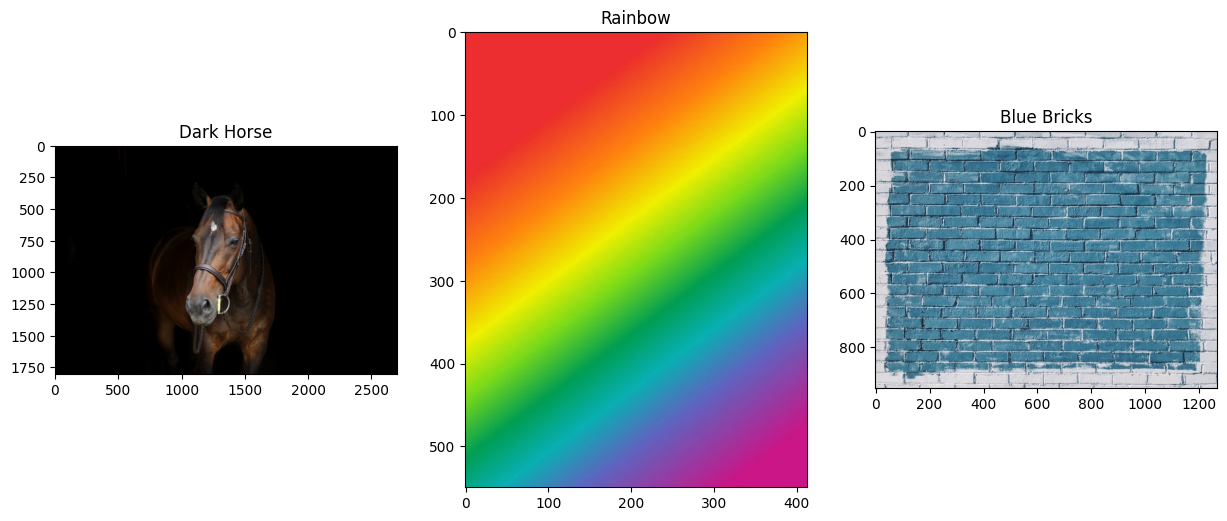

In [3]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(show_horse)
plt.title("Dark Horse")

plt.subplot(1, 3, 2)
plt.imshow(show_rainbow)
plt.title("Rainbow")

plt.subplot(1, 3, 3)
plt.imshow(show_bricks)
plt.title("Blue Bricks")

plt.show()

In [4]:
# OPENCV uses BGR
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_values.shape

(256, 1)

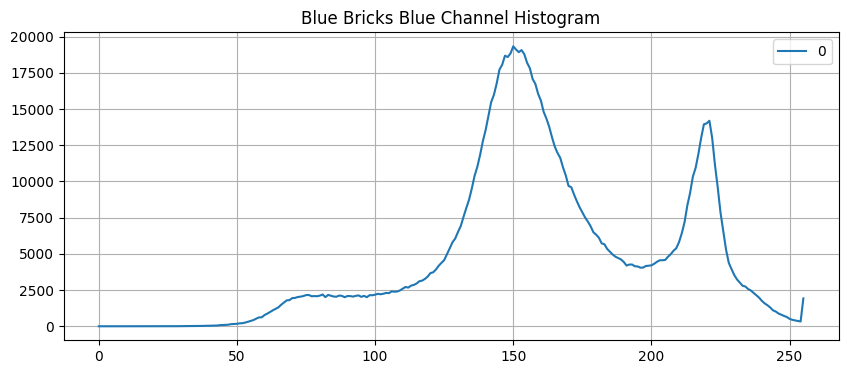

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.lineplot(hist_values)
plt.grid()
plt.title("Blue Bricks Blue Channel Histogram")
plt.show()

In [6]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_values.shape

(256, 1)

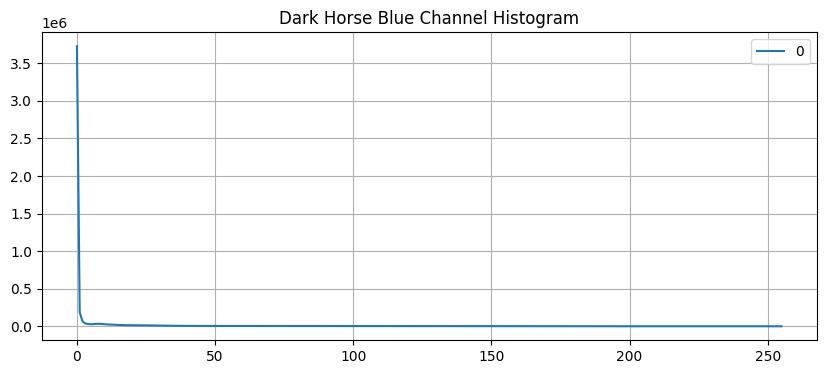

In [7]:
plt.figure(figsize=(10, 4))
sns.lineplot(hist_values)
plt.grid()
plt.title("Dark Horse Blue Channel Histogram")
plt.show()

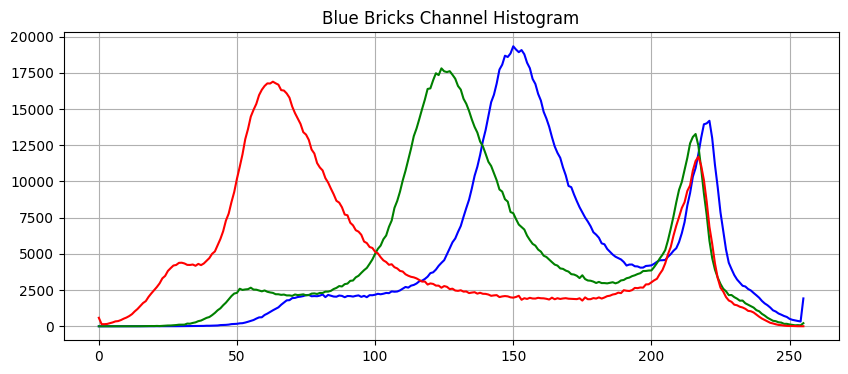

In [8]:
plt.figure(figsize=(10, 4))
for idx, channel in enumerate(['b', 'g', 'r']):
    histr = cv2.calcHist([blue_bricks], channels=[idx], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(histr, color=channel)
plt.grid()
plt.title("Blue Bricks Channel Histogram")
plt.show()

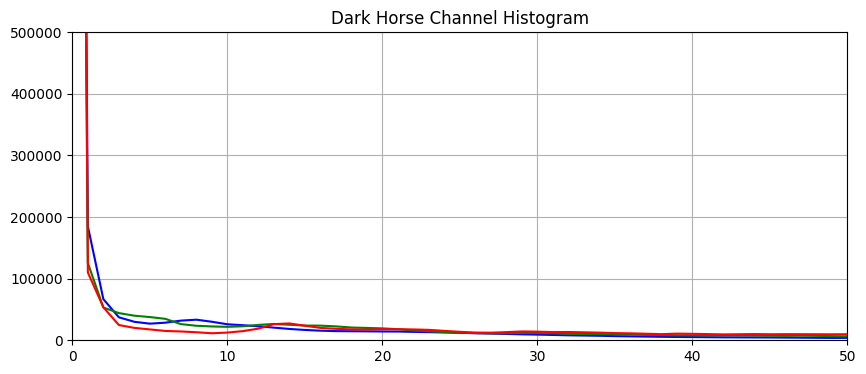

In [9]:
plt.figure(figsize=(10, 4))
for idx, channel in enumerate(['b', 'g', 'r']):
    histr = cv2.calcHist([dark_horse], channels=[idx], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(histr, color=channel)
    plt.xlim([0, 50])
    plt.ylim([0, 500_000])
plt.grid()
plt.title("Dark Horse Channel Histogram")
plt.show()

## Histogram Equalization

In [10]:
rainbow.shape

(550, 413, 3)

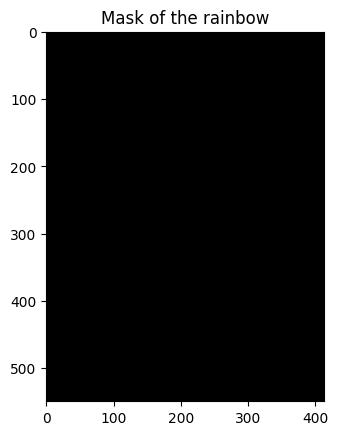

In [11]:
rainbow_mask = np.zeros(shape=rainbow.shape[:2], dtype=np.uint8)
plt.imshow(rainbow_mask, cmap='gray')
plt.title("Mask of the rainbow")
plt.show()

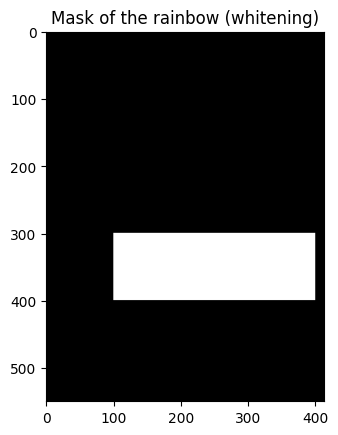

In [12]:
rainbow_mask[300:400, 100:400] = 255
plt.imshow(rainbow_mask, cmap='gray')
plt.title("Mask of the rainbow (whitening)")
plt.show()

In [13]:
masked_rainbow = cv2.bitwise_and(rainbow, rainbow, mask=rainbow_mask)
show_masked_rainbow = cv2.bitwise_and(show_rainbow, show_rainbow, mask=rainbow_mask)

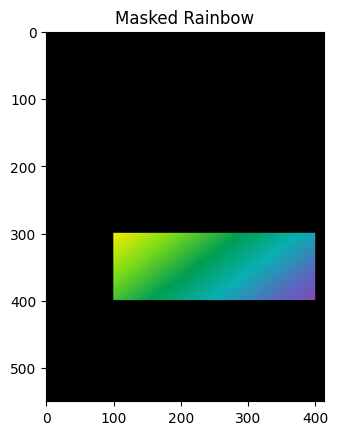

In [14]:
plt.imshow(show_masked_rainbow)
plt.title("Masked Rainbow")
plt.show()

In [15]:
hist_masked_values_red = cv2.calcHist([rainbow], channels=[2], mask=rainbow_mask, histSize=[256], ranges=[0, 256])
hist_values_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0, 256])

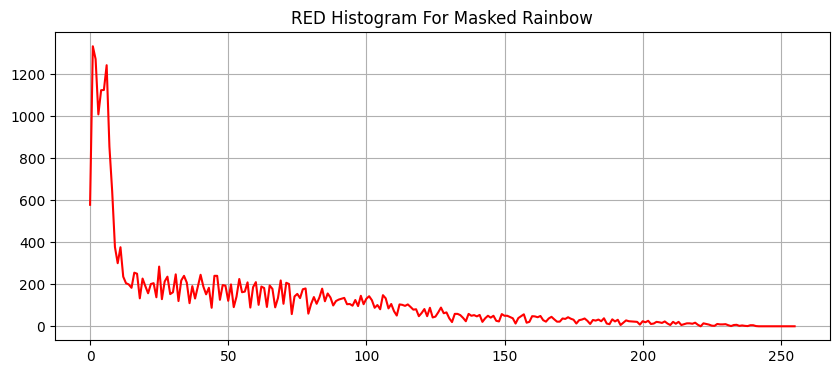

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(hist_masked_values_red, color='red')
plt.title("RED Histogram For Masked Rainbow")
plt.grid()

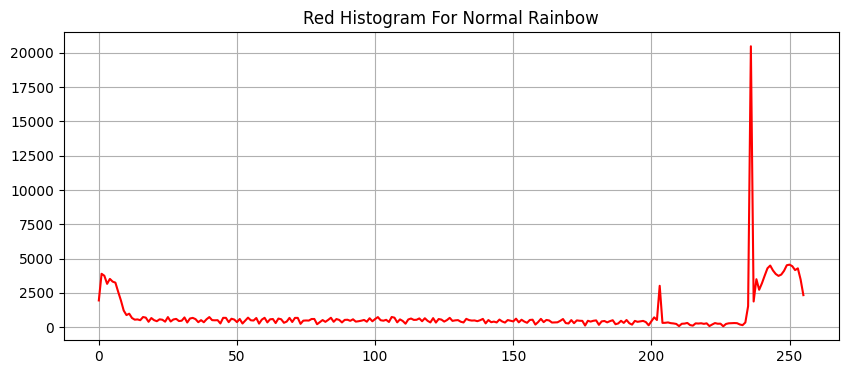

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(hist_values_red, color='red')
plt.title("Red Histogram For Normal Rainbow")
plt.grid()
plt.show()

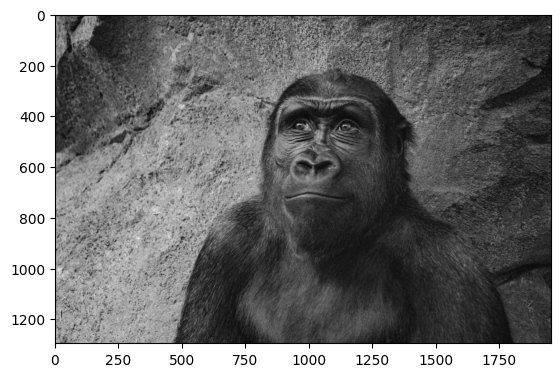

In [18]:
gorilla = cv2.imread("../../resources/DATA/gorilla.jpg", 0)
plt.imshow(gorilla, cmap='gray')
plt.show()

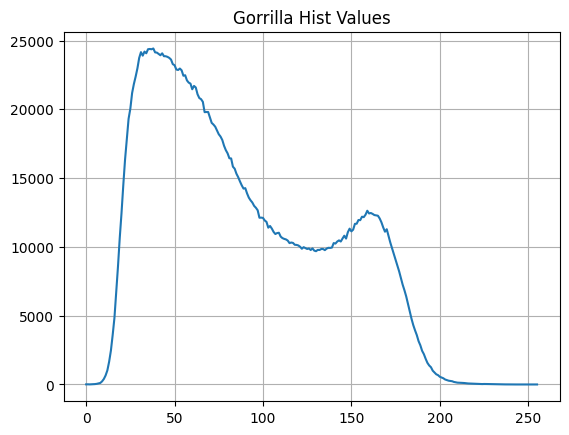

In [19]:
gorrila_hist_values = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.title("Gorrilla Hist Values")
plt.plot(gorrila_hist_values)
plt.grid()
plt.show()

In [20]:
eq_gorilla = cv2.equalizeHist(gorilla)
eq_gorilla.shape

(1295, 1955)

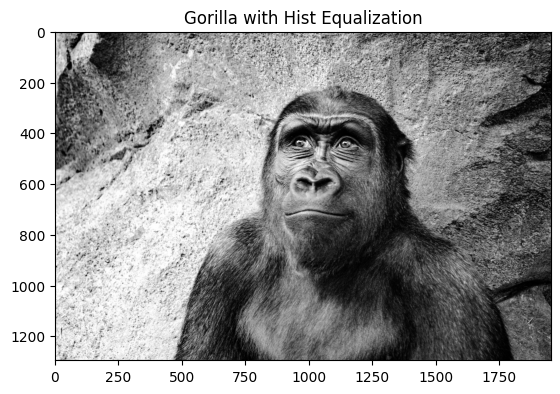

In [21]:
plt.imshow(eq_gorilla, cmap='gray')
plt.title("Gorilla with Hist Equalization")
plt.show()

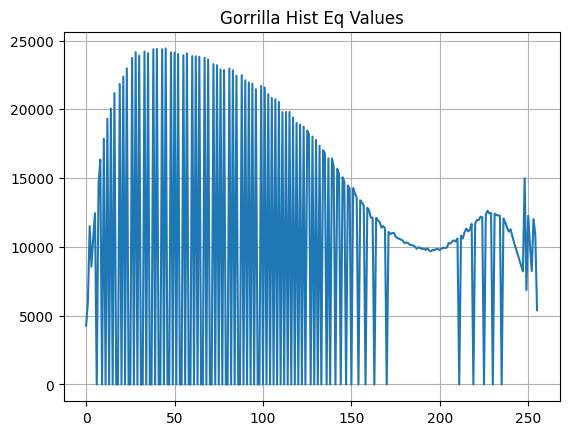

In [22]:
eq_gorrila_hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.title("Gorrilla Hist Eq Values")
plt.plot(eq_gorrila_hist_values)
plt.grid()
plt.show()

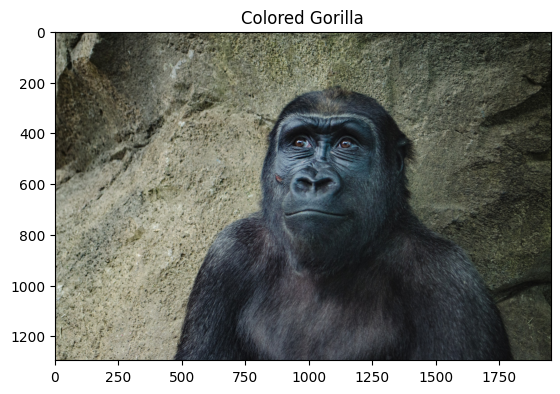

In [23]:
color_gorilla = cv2.imread("../../resources/DATA/gorilla.jpg")
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
plt.imshow(show_gorilla)
plt.title("Colored Gorilla")
plt.show()

In [24]:
hsv_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
hsv_gorilla[:, :, 2].min(), hsv_gorilla[:, :, 2].max()

(np.uint8(1), np.uint8(255))

In [25]:
hsv_gorilla[:, :, 2] = cv2.equalizeHist(hsv_gorilla[:, :, 2])

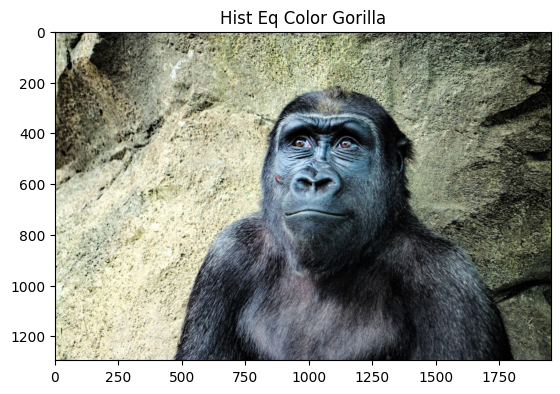

In [26]:
eq_gorilla = cv2.cvtColor(hsv_gorilla, cv2.COLOR_HSV2RGB)
plt.imshow(eq_gorilla)
plt.title("Hist Eq Color Gorilla")
plt.show()